In [24]:
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.ticker as mticker
import os

headers = ["event_id", "track_id", "type", "x", "y", "z", "delta_E", "process"]

def search_for_thing(column, search_param, my_data):
    electron_array = []
    for i in range(len(my_data.T[0])):
        if my_data.T[column][i] == search_param:
            electron_array.append(my_data[i])
    if len(electron_array) == 0:
        print("Couldn't find anything with", headers[column], f"= {search_param}")
    else: 
        print(headers[column], f" = {search_param}")
    return np.array(electron_array)


def find_electrons(my_data):
    arr = search_for_thing(2, 1, my_data) # look for electrons
    plt.scatter(arr.T[0], arr.T[1])
    plt.xlabel("event_id")
    plt.ylabel("track_id")
    
    
def integrate_over(event_num, track_num, data, param = 6):
    integrate = 0
    for i in range(len(data)):
        if data.T[0][i] == event_num and data.T[1][i] == track_num:
            integrate = integrate + data.T[param][i]
    return [event_num, track_num, integrate]
    

In [57]:
print(os.listdir("spectrum/"))

['6083.5', '6476', '7708', '7281', '6338.7', '6053.6', '7626', '4473', '5393', '5880.3', '7519', '5656', '6921.6', '7190', '5850', '6283.8', '6100', '7271', '6566.2', '7246']


type  = 1


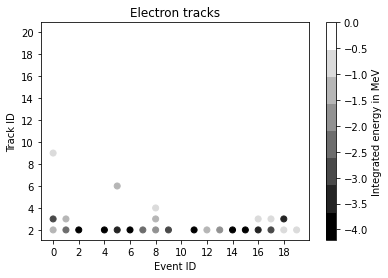

In [63]:
my_data = genfromtxt('spectrum/4473/run_nt_Hits_t0.csv', delimiter=',')
# only keep electron data
my_data = search_for_thing(2, 1, my_data)

#only keep compton data - post process name
#my_data = search_for_thing(7, 1, my_data)

# want event/track missing if not there - not zero
#print(np.unique(my_data.T[0]))
#print(np.unique(my_data.T[1]))
# integrate energy data over track_id, event_id
integrated_energy_by_event = []
for event in np.unique(my_data.T[0]):
    for track in np.unique(my_data.T[1]):
        integrated_energy_by_event.append(integrate_over(event, track, my_data))
integrated_energy_by_event = np.array(integrated_energy_by_event)

cmap = plt.cm.get_cmap("gist_gray", 8)

# erase tracks < 1.0 MeV
#for i, val in enumerate(-integrated_energy_by_event.T[2]):
#    if val < 1.0:
#        integrated_energy_by_event.T[2][i] = 0.0

plt.scatter(integrated_energy_by_event.T[0], integrated_energy_by_event.T[1], c=integrated_energy_by_event.T[2], cmap=cmap)

plt.xlabel("Event ID")
plt.ylabel("Track ID")

# set axes to integers
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))

cbar = plt.colorbar()
cbar.set_label("Integrated energy in MeV")
plt.title("Electron tracks")
plt.show()





type  = 1
event_id  = 8
track_id  = 2
track_id  = 3
track_id  = 4


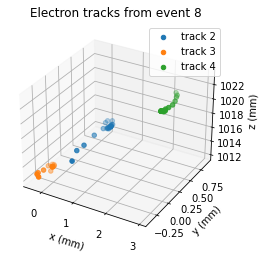

In [60]:
my_data = genfromtxt('spectrum/7271/run_nt_Hits_t0.csv', delimiter=',')
# only keep electron data
electrons = search_for_thing(2, 1, my_data)

event_8 = search_for_thing(0, 8, electrons)

track2 = search_for_thing(1, 2, event_8)

track3 = search_for_thing(1, 3, event_8)

track4 = search_for_thing(1, 4, event_8)

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(track2.T[3], track2.T[4], track2.T[5], label = "track 2")
ax.scatter(track3.T[3], track3.T[4], track3.T[5], label = "track 3")
ax.scatter(track4.T[3], track4.T[4], track4.T[5], label = "track 4")

ax.set_xlabel("x (mm)")
ax.set_ylabel("y (mm)")
ax.set_zlabel("z (mm)")
ax.legend()
ax.set_title("Electron tracks from event 8")
plt.show()


type  = 1


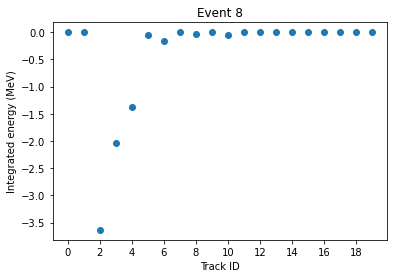

In [61]:
my_data = genfromtxt('spectrum/7271/run_nt_Hits_t0.csv', delimiter=',')
# only keep electron data
my_data = search_for_thing(2, 1, my_data)

# integrate energy data over track_id, event_id
integrated_energy_by_event = []
for event in range(0, 1):
    for track in range(0, 20):
        integrated_energy_by_event.append(integrate_over(8, track, my_data))

integrated_energy_by_event = np.array(integrated_energy_by_event)
plt.scatter(integrated_energy_by_event.T[1], integrated_energy_by_event.T[2])

#set x-axis to integers
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.xlabel("Track ID")
plt.ylabel("Integrated energy (MeV)")
plt.title("Event 8")
plt.show()